In [29]:
# we first load the class module

import dipolarBEC

In [30]:
# necessary python modules

from tqdm import tqdm
import numpy as np
import pickle
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import kn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl        
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [31]:
#check which interaction is used and save fig in the appropriate subfolder

fv = 'NN'  # 'd' or 'NN'

path_dict = {
    'd': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\dip\\",
    'NN': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\NN\\"
}

fpath = path_dict.get(fv, "Default path")

Ust = r"$U_{NN}$" if fv == "NN" else r"$U_d$" if fv == "d" else None
Ucs = r"$/U_c$"

print(fpath)

C:\Users\camipolv\Desktop\dipbec\fig\dip\


In [32]:
#parameters

Ndisr = 100
Nmesh = 1000

N0 = 2
N1 = 10
#N2 = 100
#N3 = 500

kx_small = 0.1 #0.01
kx_large_dict = {'d': 10.0, 'NN': 10.0}
kx_large = kx_large_dict.get(fv, "Default value")

Uc = 1.0

#NN: Ud << Uc/2, d: Ud << Uc/3
Ud1_dict = {'d': 0.0, 'NN': 0.0}
Ud2_dict = {'d': 0.1, 'NN': 0.1}
Ud3_dict = {'d': 0.3, 'NN': 0.3}
Ud1 = Ud1_dict.get(fv, "Default value")
Ud2 = Ud2_dict.get(fv, "Default value")
Ud3 = Ud3_dict.get(fv, "Default value")

sigma1 = 0.0
sigma2 = 0.2
sigma3 = 0.5


kxs = [kx_small, kx_large]
kxar = np.linspace(kx_small, kx_large, 10)
#ks = [0.1,1,10]
sigmas = [sigma1, sigma2, sigma3]
Sigmar = np.linspace(sigma1, sigma3, 10)
Uds = [Ud1, Ud2, Ud3]
Udar = np.linspace(Ud1, Ud3, 10)
Ntar = np.asarray([10, 50, 100, 150, 200, 250, 500])#, 1000])

markers = ['s', 'o', '^']

print(Ust + r" = {}, {}, {}".format(Ud1, Ud2, Ud3))
print(f"kx = {kx_small}, {kx_large}")

$U_d$ = 0.0, 0.1, 0.3
kx = 0.1, 10.0


In [33]:
# NB: in the following IPR means folded IPR

In [34]:
# IPR distro for 3 values of sigma, at fixed N, Ud and k 

Ntubes = N1
Ud = Uds[1]

# File paths
fpaths_sk = os.path.join(fpath, f'allipr_3s_n={Ntubes}_ud={Ud}_sk.npy')
fpaths_lk = os.path.join(fpath, f'allipr_3s_n={Ntubes}_ud={Ud}_lk.npy')

if not os.path.exists(fpaths_sk):
    runs_sk = [dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, Ud, Ndisr, s) for s in sigmas]
    iprs_sk = [run.IPRAllDisrfd() for run in tqdm(runs_sk)]
    np.save(fpaths_sk, iprs_sk)
else:
    print(f"File {fpaths_sk} already exists.")

if not os.path.exists(fpaths_lk):
    runs_lk = [dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, Ud, Ndisr, s) for s in sigmas]
    iprs_lk = [run.IPRAllDisrfd() for run in tqdm(runs_lk)]
    np.save(fpaths_lk, iprs_lk)
else:
    print(f"File {fpaths_lk} already exists.")

File C:\Users\camipolv\Desktop\dipbec\fig\dip\allipr_3s_n=10_ud=0.1_sk.npy already exists.
File C:\Users\camipolv\Desktop\dipbec\fig\dip\allipr_3s_n=10_ud=0.1_lk.npy already exists.


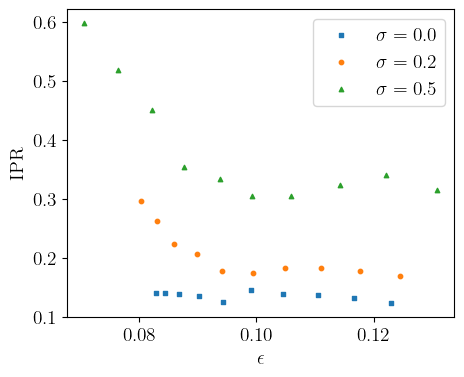

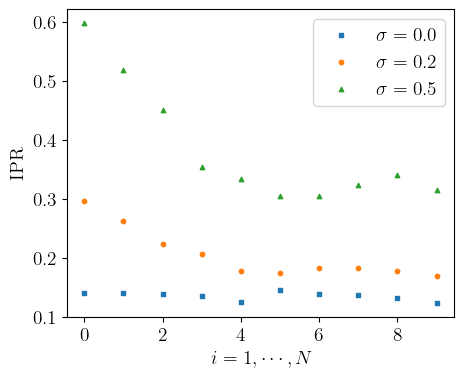

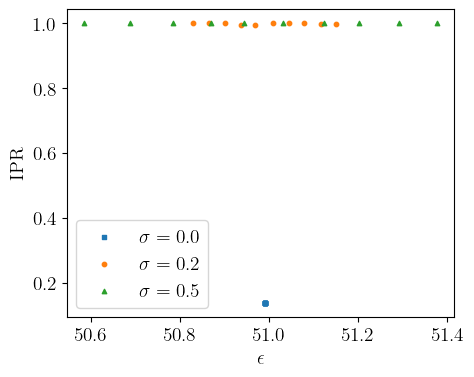

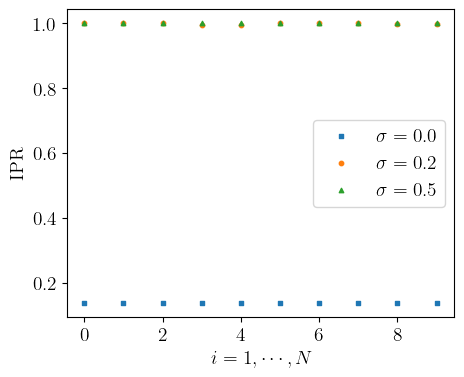

In [35]:
# IPR vs energy/index for 3 values of sigma, at fixed N, Ud and k 

def plot_allipr3s_en(ipr, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.scatter(np.real(ipr[i][0]), np.real(ipr[i][1]), label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i],  s=10)
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$\epsilon$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

def plot_allipr3s_idx(ipr, filename):
    xdata = [range(len(ip[1])) for ip in ipr]
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.scatter(xdata[i], np.real(ipr[i][1]), label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i], s=10)
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$i=1,\cdots,N$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename.format(Ud, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

ipr_sk = np.load(os.path.join(fpath,f'allipr_3s_n={Ntubes}_ud={Ud}_sk.npy'))
ipr_lk = np.load(os.path.join(fpath,f'allipr_3s_n={Ntubes}_ud={Ud}_lk.npy'))

# small k
plot_allipr3s_en(ipr_sk, f'alliprE_3s_n={Ntubes}_ud={Ud}_sk')
plot_allipr3s_idx(ipr_sk, f'alliprI_3s_n={Ntubes}_ud={Ud}_sk')


# large k
plot_allipr3s_en(ipr_lk, f'alliprE_3s_n={Ntubes}_ud={Ud}_lk')
plot_allipr3s_idx(ipr_lk, f'alliprI_3s_n={Ntubes}_ud={Ud}_lk')

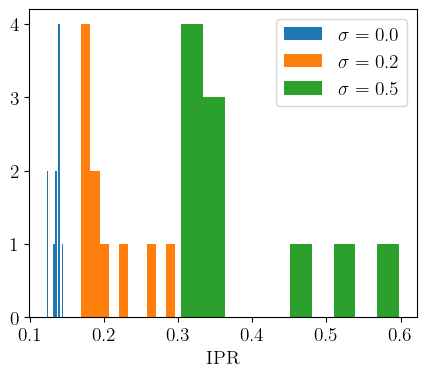

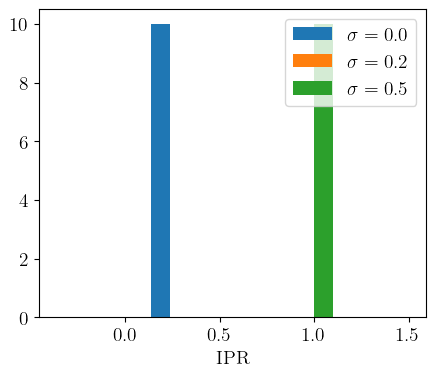

In [36]:
# IPR hist for 3 values of sigma, at fixed N, Ud and k

def hist_allipr3s(ipr, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        #print(np.real(ipr[i][1]))
        #plt.hist(np.real(ipr[i][1]), label=r'$\sigma = {}$'.format(sigmas[i]))
        plt.hist(np.round(np.real(ipr[i][1]),3), label=r'$\sigma = {}$'.format(sigmas[i]))
    plt.xlabel("IPR", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ntubes,Ud)) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename.format(sigma, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

iprs_sk = np.load(os.path.join(fpath,f'allipr_3s_n={Ntubes}_ud={Ud}_sk.npy'))
iprs_lk = np.load(os.path.join(fpath,f'allipr_3s_n={Ntubes}_ud={Ud}_lk.npy'))

# small k
hist_allipr3s(iprs_sk, "alliprhist_3s_n={}_ud={}_sk$")

# large k
hist_allipr3s(iprs_lk, "alliprhist_3s_n={}_ud={}_lk$")

In [37]:
# IPR distro for 3 values of Ud, at fixed N, sigma and k

Ntubes = N1
sigma = sigmas[1]

# File paths
fpathu_sk = os.path.join(fpath, f'allipr_3u_n={Ntubes}_s={sigma}_sk.npy')
fpathu_lk = os.path.join(fpath, f'allipr_3u_n={Ntubes}_s={sigma}_lk.npy')

if not os.path.exists(fpathu_sk):
    runu_sk = [dipolarBEC.dipolarBEC(Ntubes, kxs[0], Uc, ud, Ndisr, sigma) for ud in Uds]
    ipru_sk = [run.IPRAllDisrfd() for run in tqdm(runu_sk)]
    np.save(fpathu_sk, ipru_sk)
else:
    print(f"File {fpathu_sk} already exists.")

if not os.path.exists(fpathu_lk):
    runu_lk = [dipolarBEC.dipolarBEC(Ntubes, kxs[1], Uc, ud, Ndisr, sigma) for ud in Uds]
    ipru_lk = [run.IPRAllDisrfd() for run in tqdm(runu_lk)]
    np.save(fpathu_lk, ipru_lk)
else:
    print(f"File {fpathu_lk} already exists.")

File C:\Users\camipolv\Desktop\dipbec\fig\dip\allipr_3u_n=10_s=0.2_sk.npy already exists.
File C:\Users\camipolv\Desktop\dipbec\fig\dip\allipr_3u_n=10_s=0.2_lk.npy already exists.


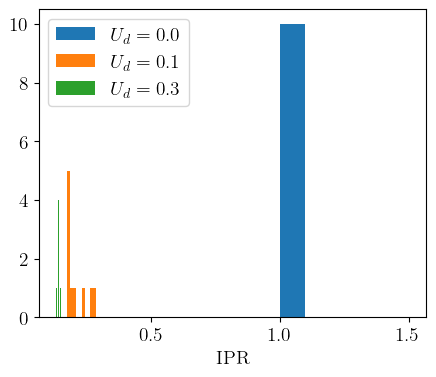

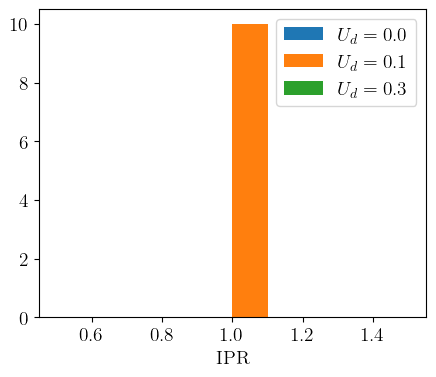

In [38]:
# IPR hist for 3 values of Ud, at fixed N, sigma and k

def hist_allipr3u(ipr, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        #print(np.real(ipr[i][1]))
        #plt.hist(np.real(ipr[i][1]), label=f'$U_d = {Uds[i]}$')
        plt.hist(np.round(np.real(ipr[i][1]),3), label=f'$U_d = {Uds[i]}$')
    plt.xlabel("IPR", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ntubes,sigma)) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename.format(sigma, Ntubes)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

ipru_sk = np.load(os.path.join(fpath,f'allipr_3u_n={Ntubes}_s={sigma}_sk.npy'))
ipru_lk = np.load(os.path.join(fpath,f'allipr_3u_n={Ntubes}_s={sigma}_lk.npy'))

# small k
hist_allipr3u(ipru_sk, "alliprhist_3u_n={}_s={}_sk$")

# large k
hist_allipr3u(ipru_lk, "alliprhist_3u_n={}_s={}_lk$")

In [39]:
# all IPRs vs N, for fixed Ud/Uc, sigma, and k

Ud = Uds[1]
sigma = sigmas[1]

# File paths
fpathN_sk = os.path.join(fpath, f'alliprN_ud={Ud}_s={sigma}_sk.pkl')
fpathN_lk = os.path.join(fpath, f'alliprN_ud={Ud}_s={sigma}_lk.pkl')


if not os.path.exists(fpathN_sk):
    iprN_sk = [dipolarBEC.dipolarBEC(n, kxs[0], Uc, Ud, Ndisr, sigma).IPRAllDisrfd()[1] for n in tqdm(Ntar)]
    with open(fpathN_sk, 'wb') as f:
        pickle.dump(iprN_sk, f)
else:
    print(f"File {fpathN_sk} already exists.")

if not os.path.exists(fpathN_lk):
    iprN_lk = [dipolarBEC.dipolarBEC(n, kxs[1], Uc, Ud, Ndisr, sigma).IPRAllDisrfd()[1] for n in tqdm(Ntar)]
    with open(fpathN_lk, 'wb') as f:
        pickle.dump(iprN_lk, f)
else:
    print(f"File {fpathN_lk} already exists.")

File C:\Users\camipolv\Desktop\dipbec\fig\dip\alliprN_ud=0.1_s=0.2_sk.pkl already exists.
File C:\Users\camipolv\Desktop\dipbec\fig\dip\alliprN_ud=0.1_s=0.2_lk.pkl already exists.


C:\Users\camipolv\AppData\Local\Temp\ipykernel_28044\2471745478.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


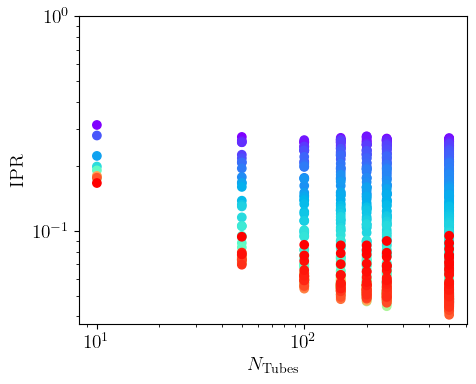

C:\Users\camipolv\AppData\Local\Temp\ipykernel_28044\2471745478.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


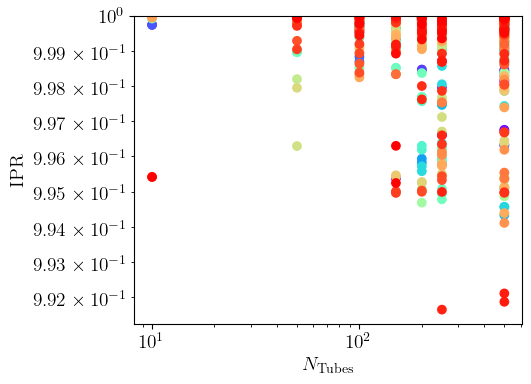

In [40]:
def plot_allipr(ipr, filename):
    plt.figure(figsize=(5,4))
    for i, N in enumerate(Ntar):
        colors = cm.rainbow(np.linspace(0, 1, len(ipr[i])))
        plt.scatter([N]*len(ipr[i]), ipr[i], color=colors)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0, 1)
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$N_{\rm Tubes}$", fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

file_path_sk = os.path.join(fpath, f'alliprN_ud={Ud}_s={sigma}_sk.pkl')
file_path_lk = os.path.join(fpath, f'alliprN_ud={Ud}_s={sigma}_lk.pkl')

with open(file_path_sk, 'rb') as file:
    iprN_sk = pickle.load(file)

with open(file_path_lk, 'rb') as file:
    iprN_lk = pickle.load(file)

# small k
plot_allipr(iprN_sk, f'alliprN_ud={Ud}_s={sigma}_sk')

# large k
plot_allipr(iprN_lk, f'alliprN_ud={Ud}_s={sigma}_lk')

In [41]:
# lowest/mid/highest IPR/csi vs Ud for three sigma, at fixed N and k

Ntubes = N1

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprU", "LIPRDisrfd"),
    ("miprU", "MIPRDisrfd"),
    ("hiprU", "HIPRDisrfd"),
    ("lcsiU", "LCSIDisrfd"),
    ("mcsiU", "MCSIDisrfd"),
    ("hcsiU", "HCSIDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}_sk"], globals()[f"{exp}_lk"] = [[] for _ in range(len(sigmas))], [[] for _ in range(len(sigmas))]

# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method, kx_index):
    file_name = os.path.join(fpath, f'{exp}_3s_n={Ntubes}_{["sk", "lk"][kx_index]}.npy')
    if not os.path.exists(file_name):
        for ud in tqdm(Udar):
            for i, s in enumerate(sigmas):
                run = dipolarBEC.dipolarBEC(Ntubes, kxs[kx_index], Uc, ud, Ndisr, s)
                result = getattr(run, method)()
                globals()[f"{exp}_{['sk', 'lk'][kx_index]}"][i].append(result)
        np.save(file_name, globals()[f"{exp}_{['sk', 'lk'][kx_index]}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment and kx_index
for exp, method in experiments:
    for kx_index in range(2):
        run_and_save(exp, method, kx_index)

File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprU_3s_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprU_3s_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprU_3s_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\lcsiU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\lcsiU_3s_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\mcsiU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\mcsiU_3s_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hcsiU_3s_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hcsiU_3s_n=10_lk.n

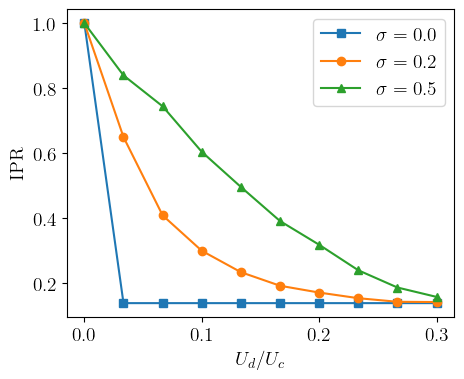

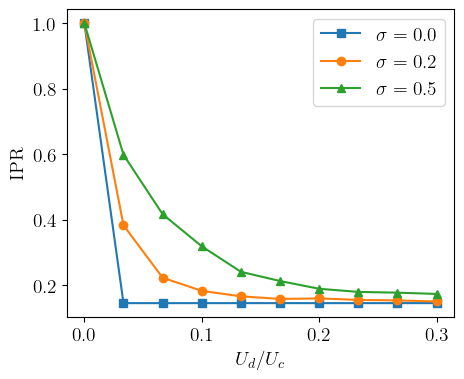

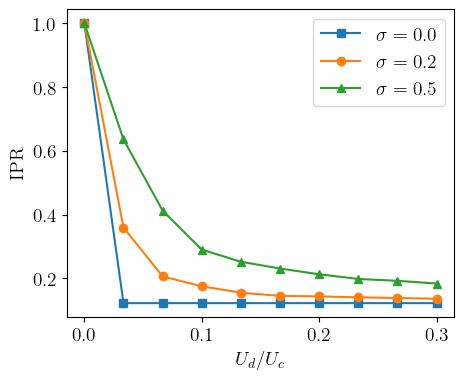

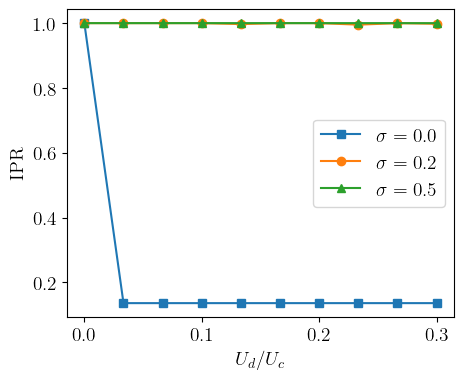

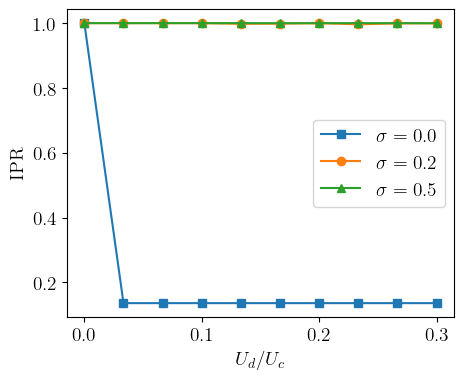

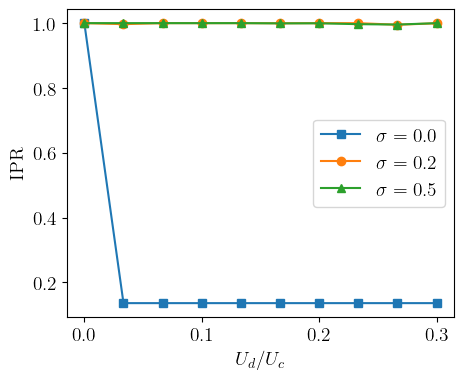

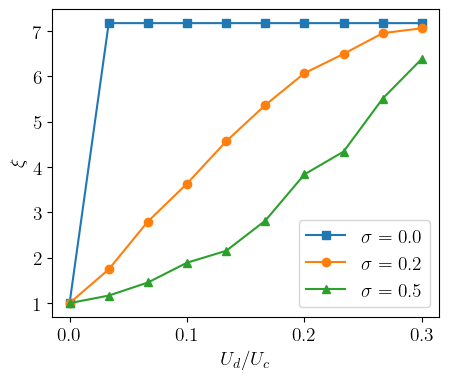

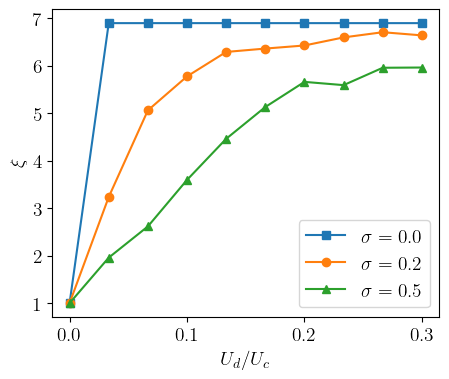

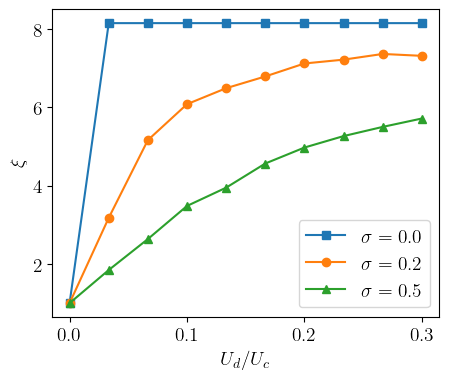

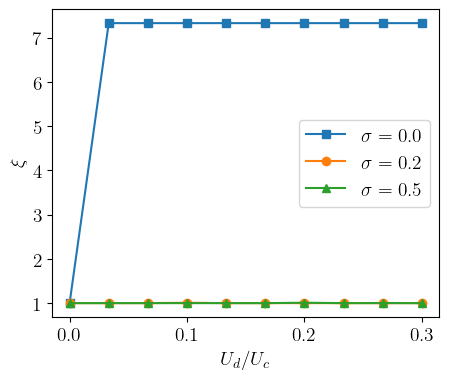

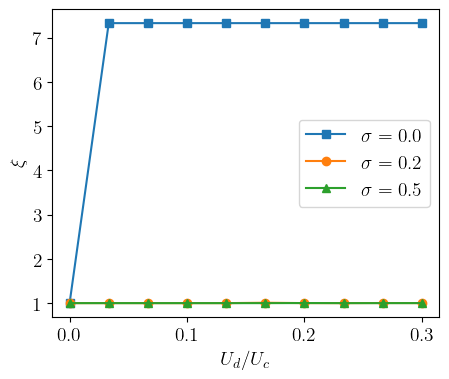

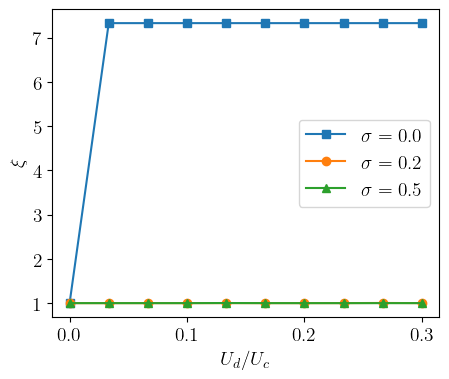

In [42]:
def plot_metric_u(metric_data, metric_label, filename):
    plt.figure(figsize=(5, 4))
    for i in range(len(metric_data)):
        plt.plot(Udar, metric_data[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.ylabel(metric_label, fontsize=14)
    plt.xlabel(Ust + Ucs, fontsize=14)
    plt.legend(loc='best', fontsize=14)
    # Save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()
    
def load_and_plot_metrics(metric_label, metric_types, sizes=['sk', 'lk']):
    for size in sizes:
        for metric_type in metric_types:
            metric_filename = f'{metric_type}_3s_n={Ntubes}_{size}'
            metric_data = np.load(os.path.join(fpath, metric_filename + '.npy'))
            plot_metric_u(metric_data, metric_label, metric_filename)

# Assuming 'fpath', 'Udar', 'sigmas', 'markers', 'Ust', 'Ucs', and 'Ntubes' are defined elsewhere
load_and_plot_metrics(metric_label=r"IPR", metric_types=['liprU', 'miprU', 'hiprU'])
load_and_plot_metrics(metric_label=r"$\xi$", metric_types=['lcsiU', 'mcsiU', 'hcsiU'])

In [43]:
# lowest/mid/highest IPR/csi vs sigma for three Ud, at fixed N and k

Ntubes = N1

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprS", "LIPRDisrfd"),
    ("miprS", "MIPRDisrfd"),
    ("hiprS", "HIPRDisrfd"),
    ("lcsiS", "LCSIDisrfd"),
    ("mcsiS", "MCSIDisrfd"),
    ("hcsiS", "HCSIDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}_sk"], globals()[f"{exp}_lk"] = [[] for _ in range(len(Uds))], [[] for _ in range(len(Uds))]

# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method, kx_index):
    file_name = os.path.join(fpath, f'{exp}_3u_n={Ntubes}_{["sk", "lk"][kx_index]}.npy')
    if not os.path.exists(file_name):
        for s in tqdm(Sigmar):
            for i, ud in enumerate(Uds):
                run = dipolarBEC.dipolarBEC(Ntubes, kxs[kx_index], Uc, ud, Ndisr, s)
                result = getattr(run, method)()
                globals()[f"{exp}_{['sk', 'lk'][kx_index]}"][i].append(result)
        np.save(file_name, globals()[f"{exp}_{['sk', 'lk'][kx_index]}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment and kx_index
for exp, method in experiments:
    for kx_index in range(2):
        run_and_save(exp, method, kx_index)

File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprS_3u_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprS_3u_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprS_3u_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\lcsiS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\lcsiS_3u_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\mcsiS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\mcsiS_3u_n=10_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hcsiS_3u_n=10_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hcsiS_3u_n=10_lk.n

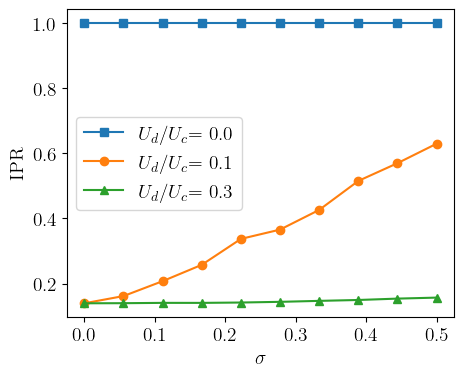

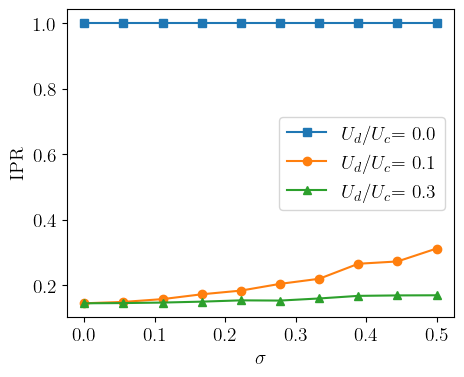

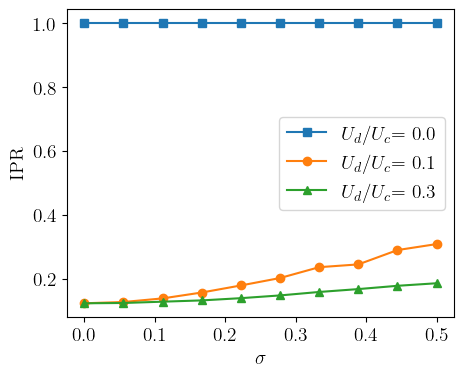

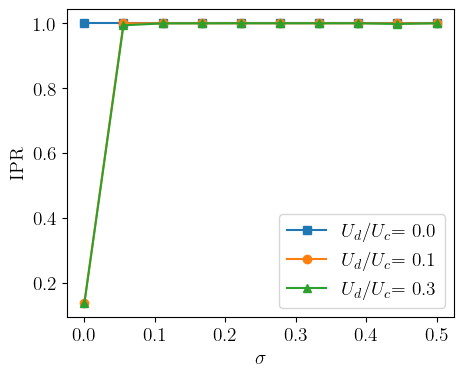

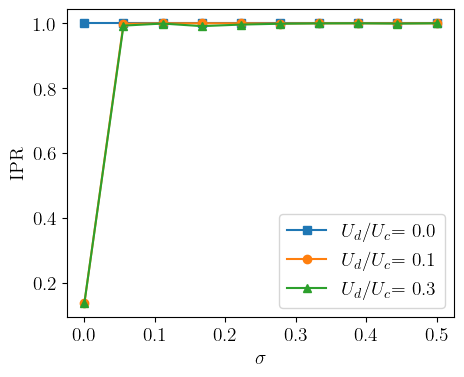

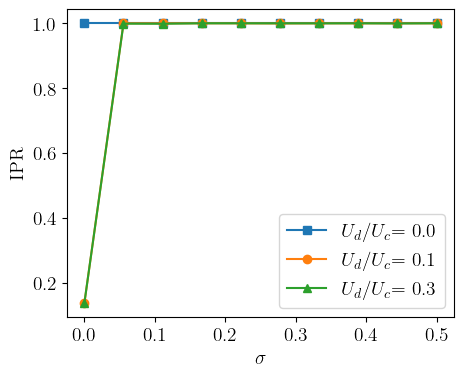

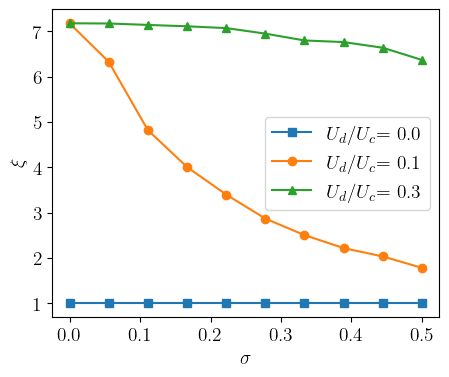

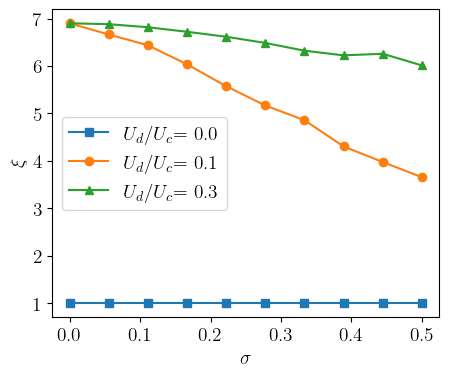

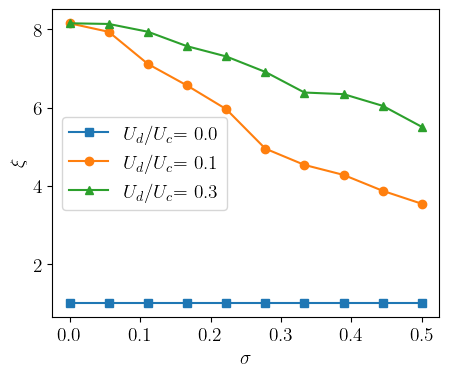

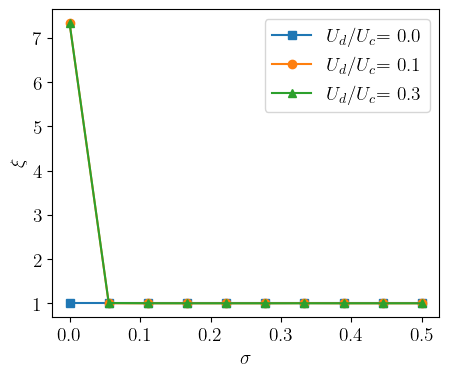

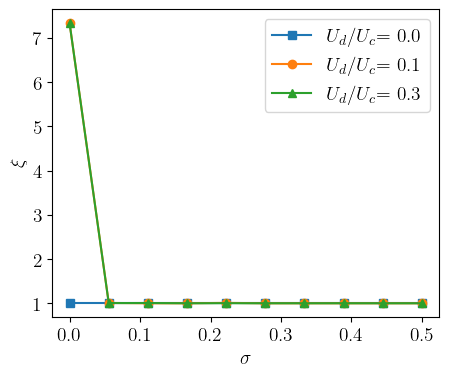

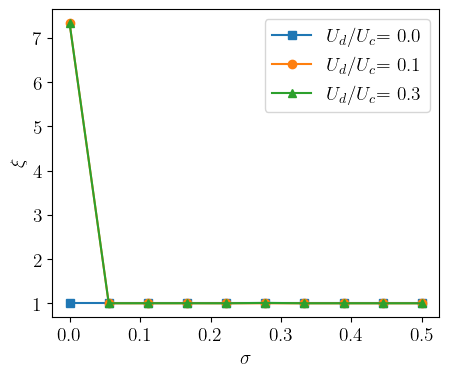

In [44]:
def plot_metric_s(metric_data, metric_label, filename):
    plt.figure(figsize=(5, 4))
    for i in range(len(metric_data)):
        plt.plot(Sigmar, metric_data[i], label=Ust+Ucs+r'= {}'.format(Uds[i]), marker=markers[i])
    plt.ylabel(metric_label, fontsize=14)
    plt.xlabel(r'$\sigma$', fontsize=14)
    plt.legend(loc='best', fontsize=14)
    # Save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()
    
def load_and_plot_metrics(metric_label, metric_types, sizes=['sk', 'lk']):
    for size in sizes:
        for metric_type in metric_types:
            metric_filename = f'{metric_type}_3u_n={Ntubes}_{size}'
            metric_data = np.load(os.path.join(fpath, metric_filename + '.npy'))
            plot_metric_s(metric_data, metric_label, metric_filename)

# Assuming 'fpath', 'Udar', 'sigmas', 'markers', 'Ust', 'Ucs', and 'Ntubes' are defined elsewhere
load_and_plot_metrics(metric_label=r"IPR", metric_types=['liprS', 'miprS', 'hiprS'])
load_and_plot_metrics(metric_label=r"$\xi$", metric_types=['lcsiS', 'mcsiS', 'hcsiS'])

In [45]:
# lowest/mid/highest IPR/csi vs kx for three sigma, at fixed N and Ud

Ntubes = N1
Ud = Uds[1]

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprk", "LIPRDisrfd"),
    ("miprk", "MIPRDisrfd"),
    ("hiprk", "HIPRDisrfd"),
    ("lcsik", "LCSIDisrfd"),
    ("mcsik", "MCSIDisrfd"),
    ("hcsik", "HCSIDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}"] = [[] for _ in range(len(sigmas))]
# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method):
    file_name = os.path.join(fpath, f'{exp}_3s_n={Ntubes}_ud={Ud}.npy')
    if not os.path.exists(file_name):
        for k in tqdm(kxar):
            for i, s in enumerate(sigmas):
                run = dipolarBEC.dipolarBEC(Ntubes, k, Uc, Ud, Ndisr, s)
                result = getattr(run, method)()
                globals()[f"{exp}"][i].append(result)
        np.save(file_name, globals()[f"{exp}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment
for exp, method in experiments:
        run_and_save(exp, method)

File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprk_3s_n=10_ud=0.1.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprk_3s_n=10_ud=0.1.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprk_3s_n=10_ud=0.1.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\lcsik_3s_n=10_ud=0.1.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\mcsik_3s_n=10_ud=0.1.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hcsik_3s_n=10_ud=0.1.npy' already exists.


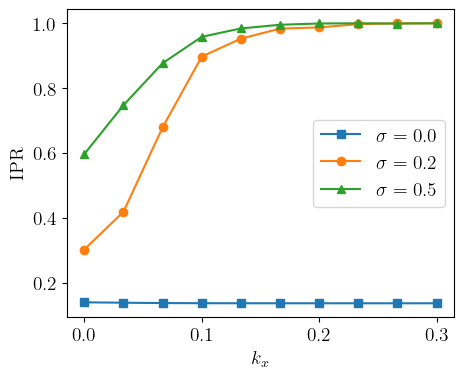

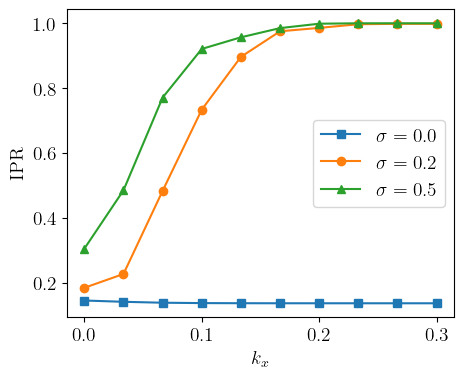

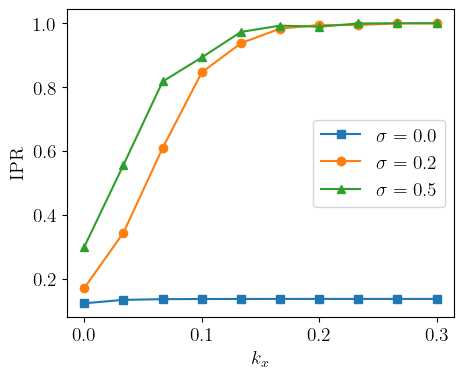

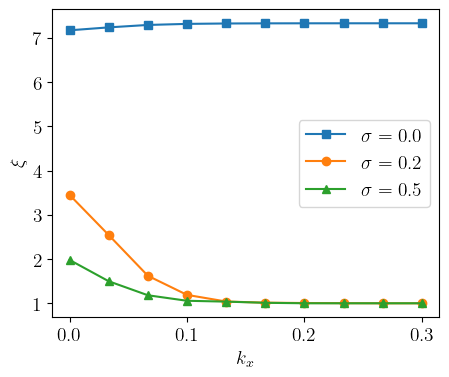

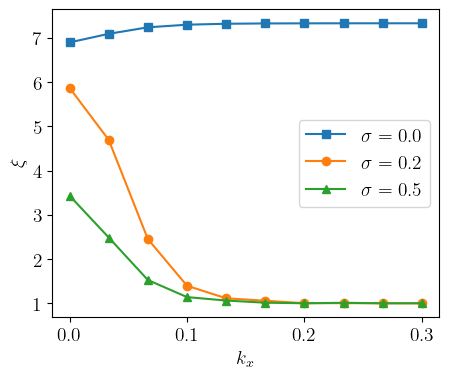

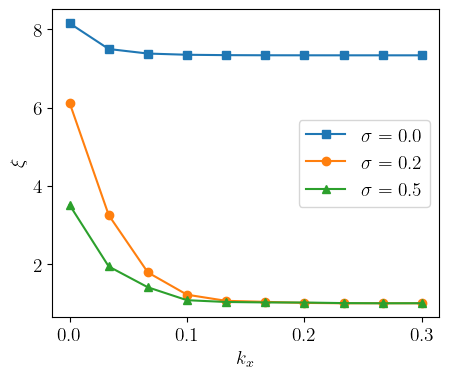

In [46]:
def plot_metric_k(metric_data, metric_label, filename):
    plt.figure(figsize=(5, 4))
    for i in range(len(metric_data)):
        plt.plot(Udar, metric_data[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    plt.ylabel(metric_label, fontsize=14)
    plt.xlabel(r"$k_x$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    # Save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()
    
def load_and_plot_metrics(metric_label, metric_types):
    for metric_type in metric_types:
        metric_filename = f'{metric_type}_3s_n={Ntubes}_ud={Ud}'
        metric_data = np.load(os.path.join(fpath, metric_filename + '.npy'))
        plot_metric_k(metric_data, metric_label, metric_filename)

# Assuming 'fpath', 'kxar', 'sigmas', 'markers', 'Ust', 'Ucs', 'Ntubes' and 'Ud' are defined elsewhere
load_and_plot_metrics(metric_label=r"IPR", metric_types=['liprk', 'miprk', 'hiprk'])
load_and_plot_metrics(metric_label=r"$\xi$", metric_types=['lcsik', 'mcsik', 'hcsik'])

In [47]:
# lowest/mid/highest IPR/csi vs kx for three Ud, at fixed N and sigma

Ntubes = N1
sigma = sigmas[1]

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprk", "LIPRDisrfd"),
    ("miprk", "MIPRDisrfd"),
    ("hiprk", "HIPRDisrfd"),
    ("lcsik", "LCSIDisrfd"),
    ("mcsik", "MCSIDisrfd"),
    ("hcsik", "HCSIDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}"] = [[] for _ in range(len(Uds))]
# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method):
    file_name = os.path.join(fpath, f'{exp}_3u_n={Ntubes}_s={sigma}.npy')
    if not os.path.exists(file_name):
        for k in tqdm(kxar):
            for i, u in enumerate(Uds):
                run = dipolarBEC.dipolarBEC(Ntubes, k, Uc, u, Ndisr, sigma)
                result = getattr(run, method)()
                globals()[f"{exp}"][i].append(result)
        np.save(file_name, globals()[f"{exp}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment
for exp, method in experiments:
        run_and_save(exp, method)

100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


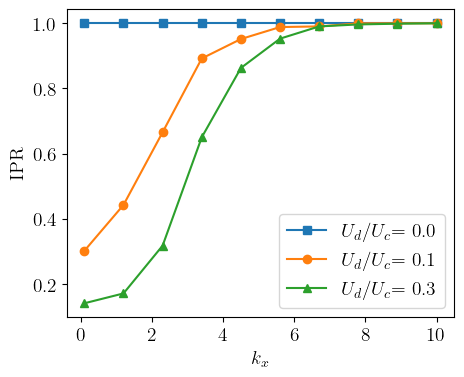

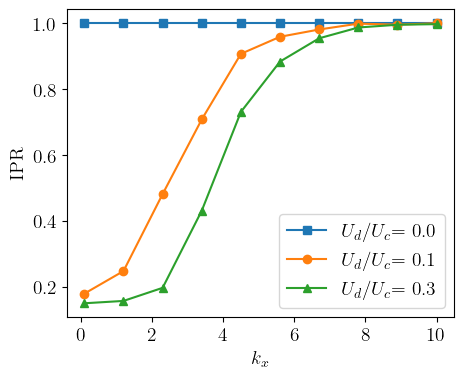

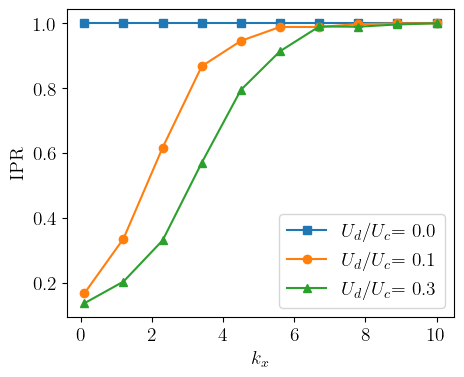

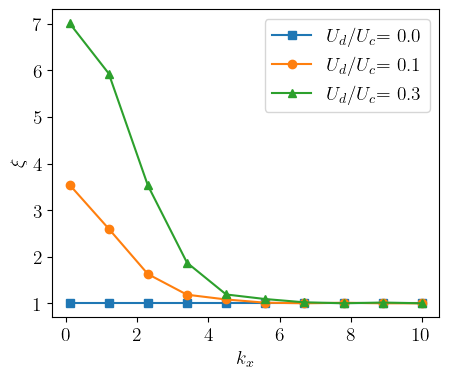

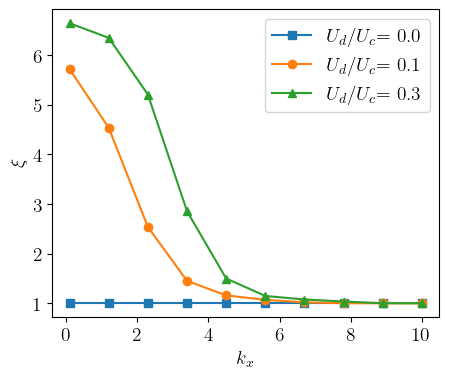

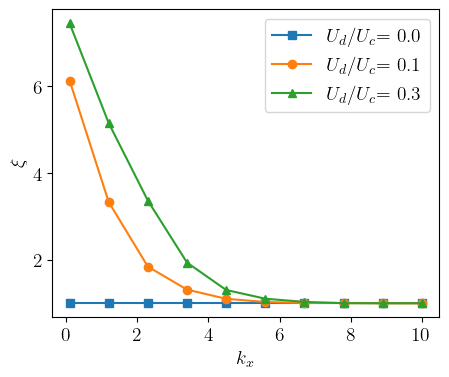

In [48]:
def plot_metric_k(metric_data, metric_label, filename):
    plt.figure(figsize=(5, 4))
    for i in range(len(metric_data)):
        plt.plot(kxar, metric_data[i], label=Ust+Ucs+r'= {}'.format(Uds[i]), marker=markers[i])
    plt.ylabel(metric_label, fontsize=14)
    plt.xlabel(r"$k_x$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    # Save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()
    
def load_and_plot_metrics(metric_label, metric_types):
    for metric_type in metric_types:
        metric_filename = f'{metric_type}_3u_n={Ntubes}_s={sigma}'
        metric_data = np.load(os.path.join(fpath, metric_filename + '.npy'))
        plot_metric_k(metric_data, metric_label, metric_filename)

# Assuming 'fpath', 'kxar', 'Uds', 'markers', 'Ust', 'Ucs', 'Ntubes' and 'sigma' are defined elsewhere
load_and_plot_metrics(metric_label=r"IPR", metric_types=['liprk', 'miprk', 'hiprk'])
load_and_plot_metrics(metric_label=r"$\xi$", metric_types=['lcsik', 'mcsik', 'hcsik'])

In [49]:
# lowest/mid/highest IPR vs N for three sigma, at fixed Ud and k

Ud = Uds[1]

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprN", "LIPRDisrfd"),
    ("miprN", "MIPRDisrfd"),
    ("hiprN", "HIPRDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}_sk"], globals()[f"{exp}_lk"] = [[] for _ in range(len(sigmas))], [[] for _ in range(len(sigmas))]

# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method, kx_index):
    file_name = os.path.join(fpath, f'{exp}_3s_ud={Ud}_{["sk", "lk"][kx_index]}.npy')
    if not os.path.exists(file_name):
        for n in tqdm(Ntar):
            for i, s in enumerate(sigmas):
                run = dipolarBEC.dipolarBEC(n, kxs[kx_index], Uc, Ud, Ndisr, s)
                result = getattr(run, method)()
                globals()[f"{exp}_{['sk', 'lk'][kx_index]}"][i].append(result)
        np.save(file_name, globals()[f"{exp}_{['sk', 'lk'][kx_index]}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment and kx_index
for exp, method in experiments:
    for kx_index in range(2):
        run_and_save(exp, method, kx_index)

File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprN_3s_ud=0.1_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprN_3s_ud=0.1_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprN_3s_ud=0.1_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprN_3s_ud=0.1_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprN_3s_ud=0.1_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprN_3s_ud=0.1_lk.npy' already exists.


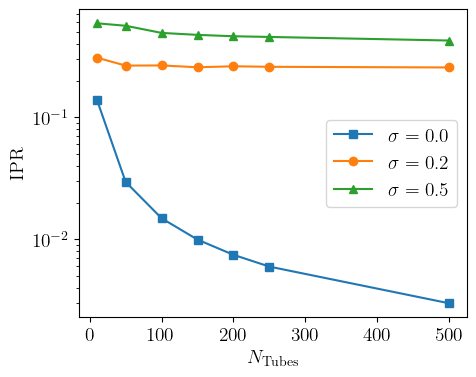

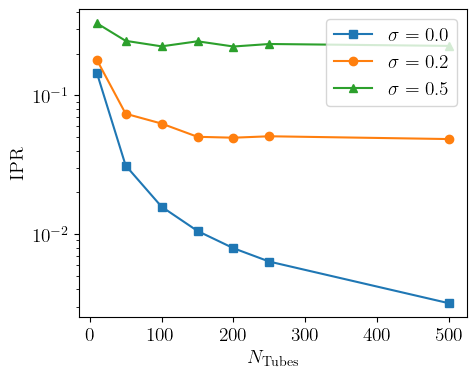

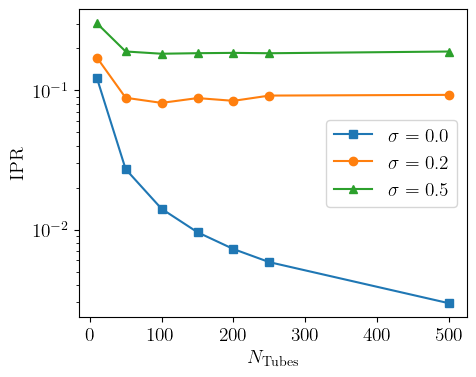

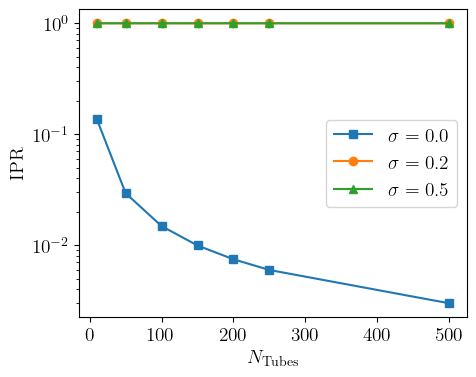

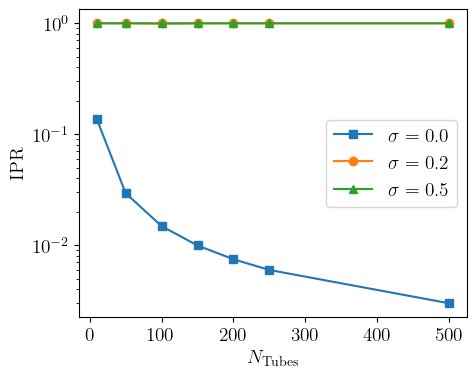

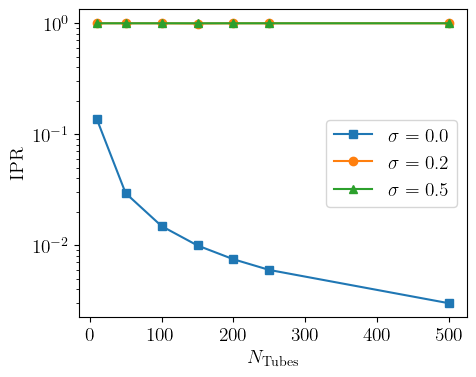

In [50]:
def plot_ipr_n_3s(ipr, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.plot(Ntar , ipr[i], label=r'$\sigma = {}$'.format(sigmas[i]), marker=markers[i])
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$N_{\rm Tubes}$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Data loading and plotting in a loop
data_sets = [('liprN_3s_ud={}_sk', liprN_sk), ('miprN_3s_ud={}_sk', miprN_sk), ('hiprN_3s_ud={}_sk', hiprN_sk),
             ('liprN_3s_ud={}_lk', liprN_lk), ('miprN_3s_ud={}_lk', miprN_lk), ('hiprN_3s_ud={}_lk', hiprN_lk)]

for label, data in data_sets:
    filename = label.format(Ud)
    data = np.load(os.path.join(fpath, filename + '.npy'))
    plot_ipr_n_3s(data, filename)

In [51]:
#lowest/mid/highest IPR vs N for three Ud, at fixed sigma and k

sigma = sigmas[1]

# Define a structure to hold the variable names and file suffixes
experiments = [
    ("liprN", "LIPRDisrfd"),
    ("miprN", "MIPRDisrfd"),
    ("hiprN", "HIPRDisrfd")
]

# Initialize lists for each experiment
for exp, _ in experiments:
    globals()[f"{exp}_sk"], globals()[f"{exp}_lk"] = [[] for _ in range(len(Uds))], [[] for _ in range(len(Uds))]

# Function to run experiment and save results if file doesn't exist
def run_and_save(exp, method, kx_index):
    file_name = os.path.join(fpath, f'{exp}_3u_s={sigma}_{["sk", "lk"][kx_index]}.npy')
    if not os.path.exists(file_name):
        for n in tqdm(Ntar):
            for i, ud in enumerate(Uds):
                run = dipolarBEC.dipolarBEC(n, kxs[kx_index], Uc, ud, Ndisr, sigma)
                result = getattr(run, method)()
                globals()[f"{exp}_{['sk', 'lk'][kx_index]}"][i].append(result)
        np.save(file_name, globals()[f"{exp}_{['sk', 'lk'][kx_index]}"])
    else:
        print(f"File '{file_name}' already exists.")

# Loop through each experiment and kx_index
for exp, method in experiments:
    for kx_index in range(2):
        run_and_save(exp, method, kx_index)

File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprN_3u_s=0.2_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\liprN_3u_s=0.2_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprN_3u_s=0.2_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\miprN_3u_s=0.2_lk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprN_3u_s=0.2_sk.npy' already exists.
File 'C:\Users\camipolv\Desktop\dipbec\fig\dip\hiprN_3u_s=0.2_lk.npy' already exists.


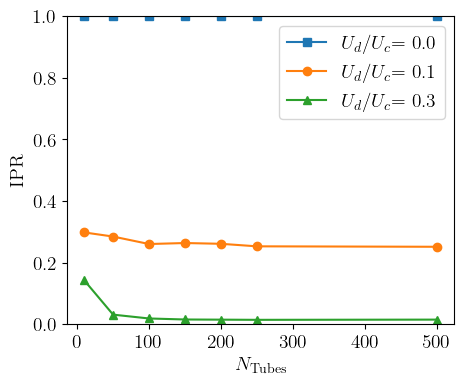

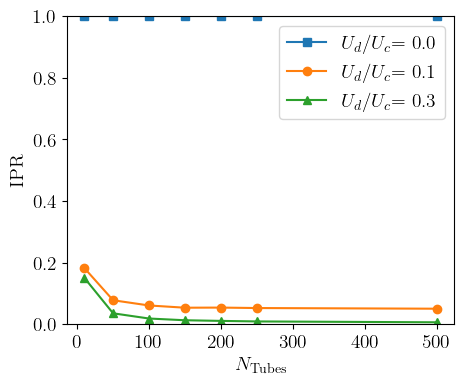

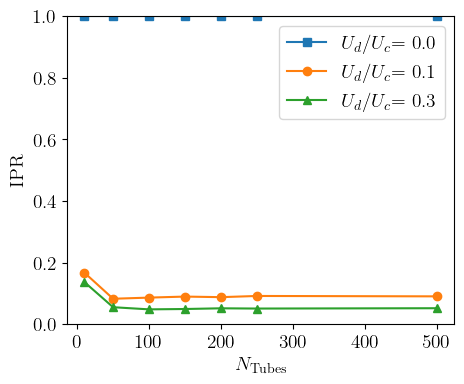

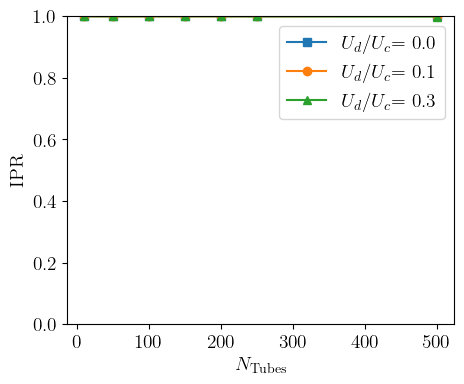

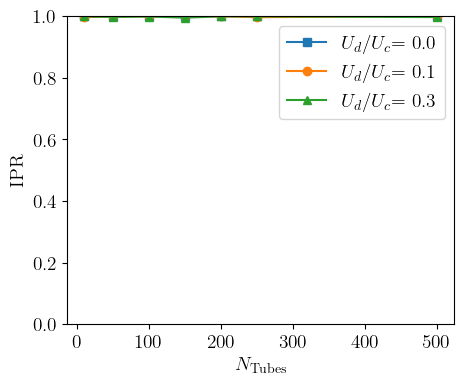

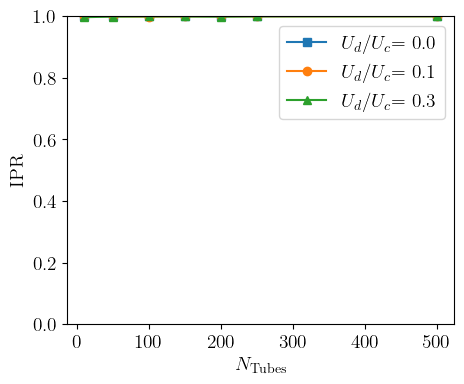

In [52]:
def plot_ipr_n_3u(ipr, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(ipr)):
        plt.plot(Ntar , ipr[i], label=Ust+Ucs+r'= {}'.format(Uds[i]), marker=markers[i])
    #plt.xscale('log')
    #plt.yscale('log')
    plt.ylim(0, 1)
    plt.ylabel(r"IPR", fontsize=14)
    plt.xlabel(r"$N_{\rm Tubes}$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename) + ".jpg", format='jpg', bbox_inches='tight')
    #plt.savefig(os.path.join(fpath, filename) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Data loading and plotting in a loop
data_sets = [('liprN_3u_s={}_sk', liprN_sk), ('miprN_3u_s={}_sk', miprN_sk), ('hiprN_3u_s={}_sk', hiprN_sk),
             ('liprN_3u_s={}_lk', liprN_lk), ('miprN_3u_s={}_lk', miprN_lk), ('hiprN_3u_s={}_lk', hiprN_lk)]

for label, data in data_sets:
    filename = label.format(sigma)
    data = np.load(os.path.join(fpath, filename + '.npy'))
    plot_ipr_n_3u(data, filename)